In [1]:
# ! pip install currency_converter
# imports
from currency_converter import CurrencyConverter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read file
data = pd.read_csv("cleanedsamsungtesting.csv")
#print(data)

In [ ]:
!pip install CurrencyConverter

input year: 2017
input month (1-12): 2
         date     open     high      low    close    adj_close      volume  \
0  2017-02-01  39540.0  39660.0  39040.0  39120.0  8268.416992  14150400.0   
1  2017-02-02  39600.0  39660.0  39200.0  39360.0  8319.143555  15029300.0   
2  2017-02-03  39400.0  39500.0  39180.0  39460.0  8340.279297  10386350.0   
3  2017-02-06  39580.0  39660.0  39140.0  39560.0  8361.416016   8860700.0   
4  2017-02-07  39560.0  39580.0  38760.0  38820.0  8205.007813  14041800.0   
5  2017-02-08  38740.0  38780.0  38200.0  38400.0  8116.237305  17092950.0   
6  2017-02-09  38780.0  38840.0  38220.0  38400.0  8116.237305  13694150.0   
7  2017-02-10  38400.0  38760.0  38300.0  38360.0  8107.782715  11020750.0   
8  2017-02-13  37740.0  38060.0  37720.0  37960.0  8023.238770  11102050.0   
9  2017-02-14  37960.0  38260.0  37320.0  37580.0  7942.922363  13124150.0   
10 2017-02-15  37080.0  37960.0  37080.0  37720.0  7972.512207  14191550.0   
11 2017-02-16  37800.0  3

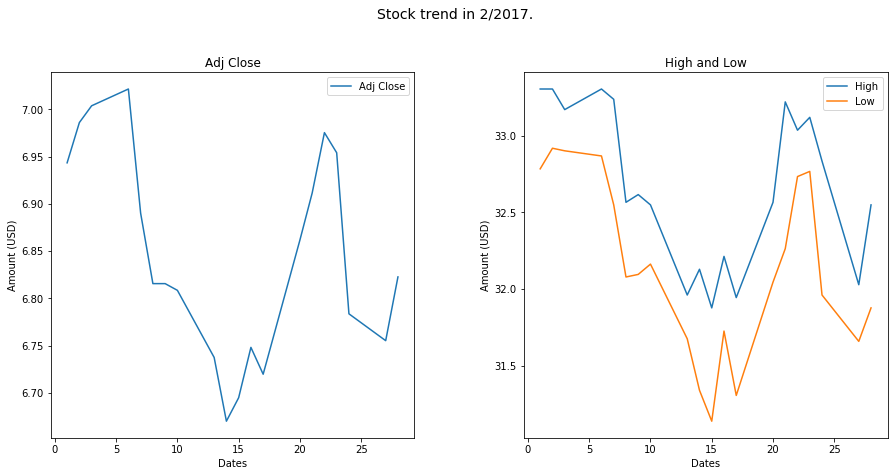

In [8]:
# Visualisation for both selected year and month

#convert  date data to datetime format
theDates =  pd.to_datetime(data['date'], format='%m/%d/%Y')

#data for selected year
a = input("input year: ")
cdates = []
copen = []
chigh = []
clow = []
cclose = []
cadj_close = []
cvolume = []
cstockname = []
cdf = pd.DataFrame()

#print(data.open)

for i in range(len(theDates)):
    if int(a) == int(theDates[i].year):
        cdates.append(theDates[i])
        copen.append(data.open[i])
        chigh.append(data.high[i])
        clow.append(data.low[i])
        cclose.append(data.close[i])
        cadj_close.append(data.adj_close[i])
        cvolume.append(data.volume[i])
        cstockname.append(data.Stockname[i])

cdf.insert(0, 'date', cdates, True)
cdf.insert(1, 'open', copen, True)
cdf.insert(2, 'high', chigh, True)
cdf.insert(3, 'low', clow, True)
cdf.insert(4, 'close', cclose, True)
cdf.insert(5, 'adj_close', cadj_close, True)
cdf.insert(6, 'volume', cvolume, True)
cdf.insert(7, 'Stockname', cstockname, True)
        
#print(cdf)

#data for selected month
b = int(input("input month (1-12): "))
mdates = []
mopen = []
mhigh = []
mlow = []
mclose = []
madj_close = []
mvolume = []
mstockname = []
mdf = pd.DataFrame()
for i in range(len(cdf.date)):
    if int(b) == int(cdf.date[i].month):
        mdates.append(cdf.date[i])
        mopen.append(cdf.open[i])
        mhigh.append(cdf.high[i])
        mlow.append(cdf.low[i])
        mclose.append(cdf.close[i])
        madj_close.append(cdf.adj_close[i])
        mvolume.append(cdf.volume[i])
        mstockname.append(cdf.Stockname[i])
mdf.insert(0, 'date', mdates, True)
mdf.insert(1, 'open', mopen, True)
mdf.insert(2, 'high', mhigh, True)
mdf.insert(3, 'low', mlow, True)
mdf.insert(4, 'close', mclose, True)
mdf.insert(5, 'adj_close', madj_close, True)
mdf.insert(6, 'volume', mvolume, True)
mdf.insert(7, 'Stockname', mstockname, True)


#convert to usd
def convert(amount):
    c = CurrencyConverter()
    value = c.convert(amount, "KRW", "USD")
    return value
    
convertopenarr = []
converthigharr = []
convertlowarr = []
convertclosearr = []
convertadjclosearr = []
    
for i in range(len(mdf.open)):
    convertopen = float(convert(mdf.open[i]))
    convertopenarr.append(convertopen)
    converthigh = float(convert(mdf.high[i]))
    converthigharr.append(converthigh)
    convertlow = float(convert(mdf.low[i]))
    convertlowarr.append(convertlow)
    convertclose = float(convert(mdf.close[i]))
    convertclosearr.append(convertclose)
    convertadjclose = float(convert(mdf.adj_close[i]))
    convertadjclosearr.append(convertadjclose)
mdf.insert(8, 'Open_USD', convertopenarr, True)
mdf.insert(9, 'High_USD', converthigharr, True)
mdf.insert(10, 'Low_USD', convertlowarr, True)
mdf.insert(11, 'Close_USD', convertclosearr, True)
mdf.insert(12, 'Adj_Close_USD', convertadjclosearr, True)

print(mdf)

#print(mdf)
mdates = pd.to_datetime(mdf['date'], format='%Y/%m/%d')
x = []
for dates in mdates:
    if int(dates.month) == b:
        x.append(dates.day)

        
#x = mdf.date
y_adjclose = mdf.Adj_Close_USD
y_high = mdf.High_USD
y_low = mdf.Low_USD

fig = plt.figure(figsize=(15,7))
title = fig.suptitle('Stock trend in {}/{}.'.format(b , a), fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Adj Close")
ax1.set_xlabel('Dates') 
ax1.set_ylabel('Amount (USD)')
ax1.plot(x,y_adjclose, label="Adj Close")

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("High and Low")
ax2.set_xlabel('Dates') 
ax2.set_ylabel('Amount (USD)')
ax2.plot(x,y_high, label="High")
ax2.plot(x,y_low, label="Low")

#plt.subplot(211)
#plt.plot(x,y_adjclose, label="Adj Close")
#plt.subplot(212)
#plt.plot(x,y_high, label="High")
#plt.subplot(213)
#plt.plot(x,y_low, label="Low")
#plt.xlabel('Dates') 
#plt.ylabel('Adj Close (USD)') 
#plt.title('Stock trend in {}/{}.'.format(b , a))


#plt.subplots(figsize=(15, 10))
#plt.xlim(1,30)


ax1.legend()
ax2.legend()
plt.show()

 

In [ ]:
# Visualisation for both selected year and month

#convert  date data to datetime format
theDates =  pd.to_datetime(data['date'], format='%m/%d/%Y')

#convert KRW to USD
def convert(amount):
    c = CurrencyConverter()
    value = c.convert(amount, "KRW", "USD")
    return value

convertopenarrStart = []
converthigharrStart = []
convertlowarrStart = []
convertclosearrStart = []
convertadjclosearrStart = []
    
for i in range(len(data.open)):
    convertopen = float(convert(data.open[i]))
    convertopenarrStart.append(convertopen)
    converthigh = float(convert(data.high[i]))
    converthigharrStart.append(converthigh)
    convertlow = float(convert(data.low[i]))
    convertlowarrStart.append(convertlow)
    convertclose = float(convert(data.close[i]))
    convertclosearrStart.append(convertclose)
    convertadjclose = float(convert(data.adj_close[i]))
    convertadjclosearrStart.append(convertadjclose)
data.insert(8, 'Open_USD', convertopenarrStart, True)
data.insert(9, 'High_USD', converthigharrStart, True)
data.insert(10, 'Low_USD', convertlowarrStart, True)
data.insert(11, 'Close_USD', convertclosearrStart, True)
data.insert(12, 'Adj_Close_USD', convertadjclosearrStart, True)

print(data)

#data for selected year
a = input("input year: ")
cdates = []
copen = []
chigh = []
clow = []
cclose = []
cadj_close = []
cvolume = []
cstockname = []
copenusd = []
chighusd = []
clowusd = []
ccloseusd = []
cadjcloseusd = []
cdf = pd.DataFrame()

#print(data.open)

for i in range(len(theDates)):
    if int(a) == int(theDates[i].year):
        cdates.append(theDates[i])
        copen.append(data.open[i])
        chigh.append(data.high[i])
        clow.append(data.low[i])
        cclose.append(data.close[i])
        cadj_close.append(data.adj_close[i])
        cvolume.append(data.volume[i])
        cstockname.append(data.Stockname[i])
        copenusd.append(data.Open_USD[i])
        chighusd.append(data.High_USD[i])
        clowusd.append(data.Low_USD[i])
        ccloseusd.append(data.Close_USD[i])
        cadjcloseusd.append(data.Adj_Close_USD[i])
        

cdf.insert(0, 'date', cdates, True)
cdf.insert(1, 'open', copen, True)
cdf.insert(2, 'high', chigh, True)
cdf.insert(3, 'low', clow, True)
cdf.insert(4, 'close', cclose, True)
cdf.insert(5, 'adj_close', cadj_close, True)
cdf.insert(6, 'volume', cvolume, True)
cdf.insert(7, 'Stockname', cstockname, True)
cdf.insert(8, 'Open_USD', copenusd, True)
cdf.insert(9, 'High_USD', chighusd, True)
cdf.insert(10, 'Low_USD', clowusd, True)
cdf.insert(11, 'Close_USD', ccloseusd, True)
cdf.insert(12, 'Adj_Close_USD', cadjcloseusd, True)

        
#print(cdf)

#data for selected month
b = int(input("input month (1-12): "))
mdates = []
mopen = []
mhigh = []
mlow = []
mclose = []
madj_close = []
mvolume = []
mstockname = []
mopenusd = []
mhighusd = []
mlowusd = []
mcloseusd = []
madjcloseusd = []
mdf = pd.DataFrame()
for i in range(len(cdf.date)):
    if int(b) == int(cdf.date[i].month):
        mdates.append(cdf.date[i])
        mopen.append(cdf.open[i])
        mhigh.append(cdf.high[i])
        mlow.append(cdf.low[i])
        mclose.append(cdf.close[i])
        madj_close.append(cdf.adj_close[i])
        mvolume.append(cdf.volume[i])
        mstockname.append(cdf.Stockname[i])
        mopenusd.append(cdf.Open_USD[i])
        mhighusd.append(cdf.High_USD[i])
        mlowusd.append(cdf.Low_USD[i])
        mcloseusd.append(cdf.Close_USD[i])
        madjcloseusd.append(cdf.Adj_Close_USD[i])
        
mdf.insert(0, 'date', mdates, True)
mdf.insert(1, 'open', mopen, True)
mdf.insert(2, 'high', mhigh, True)
mdf.insert(3, 'low', mlow, True)
mdf.insert(4, 'close', mclose, True)
mdf.insert(5, 'adj_close', madj_close, True)
mdf.insert(6, 'volume', mvolume, True)
mdf.insert(7, 'Stockname', mstockname, True)
mdf.insert(8, 'Open_USD', mopenusd, True)
mdf.insert(9, 'High_USD', mhighusd, True)
mdf.insert(10, 'Low_USD', mlowusd, True)
mdf.insert(11, 'Close_USD', mcloseusd, True)
mdf.insert(12, 'Adj_Close_USD', madjcloseusd, True)



print(mdf)

#print(mdf)
mdates = pd.to_datetime(mdf['date'], format='%Y/%m/%d')
x = []
for dates in mdates:
    if int(dates.month) == b:
        x.append(dates.day)

        
#x = mdf.date
y_adjclose = mdf.Adj_Close_USD
y_high = mdf.High_USD
y_low = mdf.Low_USD

fig = plt.figure(figsize=(15,7))
title = fig.suptitle('Stock trend in {}/{}.'.format(b , a), fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Adj Close")
ax1.set_xlabel('Dates') 
ax1.set_ylabel('Amount (USD)')
ax1.plot(x,y_adjclose, label="Adj Close")

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("High and Low")
ax2.set_xlabel('Dates') 
ax2.set_ylabel('Amount (USD)')
ax2.plot(x,y_high, label="High")
ax2.plot(x,y_low, label="Low")

#plt.subplot(211)
#plt.plot(x,y_adjclose, label="Adj Close")
#plt.subplot(212)
#plt.plot(x,y_high, label="High")
#plt.subplot(213)
#plt.plot(x,y_low, label="Low")
#plt.xlabel('Dates') 
#plt.ylabel('Adj Close (USD)') 
#plt.title('Stock trend in {}/{}.'.format(b , a))


#plt.subplots(figsize=(15, 10))
#plt.xlim(1,30)


ax1.legend()
ax2.legend()
plt.show()
